# Check alpha constraints for bispectrum

### Import all modules

In [1]:
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt
from itertools import permutations
from scipy.interpolate import RegularGridInterpolator
import scipy.interpolate as interpolate

import pandas as pd

import scipy.stats

## Load data

In [2]:
Bk=np.load("bk_z0.50.npz")
Pk=np.load("../GLAM_Ps/pk_z0.50.npz")

In [3]:
k,pkrm,pkr=Pk['k'], Pk['pkrm'].T[0], Pk['pkr']
kk,bkrm,bkr=Bk['k'], Bk['bkrm'].T[0], Bk['bkr']

## Interpolation of Pk

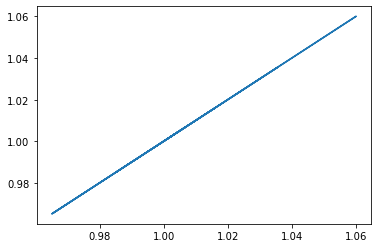

In [4]:
ffp=interpolate.interp1d(k,pkrm,fill_value=None)
plt.plot(pkrm,ffp(k))
#plt.xlim(0,500)
#plt.plot(ffp(Pk[:,0]))
#plt.xlim(500,550)

## Interpolation of Bispectrum

#### 1. scipy.interpolate.RegularGridInterpolator

In [5]:
k1=np.unique(kk[:,0])
k2=np.unique(kk[:,1])
k3=np.unique(kk[:,2])

kk1,kk2,kk3=np.meshgrid(k1,k2,k3)

tup_Bk=[tuple(i) for i in kk]

In [6]:
output = np.empty(shape=(len(k1),len(k2),len(k3)))

for i in range(len(k1)):
    for j in range(len(k2)):
        for l in range(len(k3)):
            kkk=[i for i in permutations((kk1[i,j,l],kk2[i,j,l],kk3[i,j,l]))]
            if any(set(kkk).intersection(set(tup_Bk))):
                ind=tup_Bk.index(list(set(kkk).intersection(set(tup_Bk)))[0])
                #print((kk1[i,j,k],kk2[i,j,k],kk3[i,j,k]))
                #print(Bk5[ind,0:3])
                output[i,j,l]=bkrm[ind]
            else:
                output[i,j,l]=np.nan   

In [7]:
output[:3,:3,:3]

array([[[1.23460239,        nan,        nan],
        [       nan, 1.04134798,        nan],
        [       nan,        nan, 0.99714893]],

       [[       nan, 1.04134798,        nan],
        [1.04134798, 0.90469183, 0.98172601],
        [       nan, 0.98172601, 0.98572638]],

       [[       nan,        nan, 0.99714893],
        [       nan, 0.98172601, 0.98572638],
        [0.99714893, 0.98572638, 0.93994002]]])

#### Interpolating output so that the nan values in the missing places gets filled

In [8]:
output1=output.flatten()
output1=pd.DataFrame(output1)
output1=output1.interpolate(method='linear', limit_direction='forward', axis=0)

In [9]:
output1=np.array(output1)
output1=np.reshape(output1,(len(k1),len(k2),len(k3)))

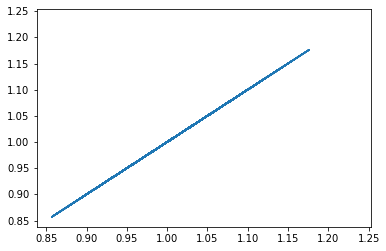

In [10]:
plt.plot(output.flatten(),output1.flatten())

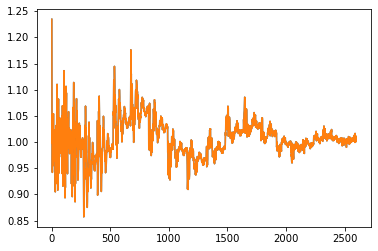

In [11]:
ffb=RegularGridInterpolator((k1,k2,k3),output1,method="linear",bounds_error=False,fill_value=None)
plt.plot(bkrm);
plt.plot(ffb((kk)));

## Joint fits

In [12]:
data_join=np.array([*pkrm,*bkrm])

In [13]:
data_join.shape

(2630,)

In [50]:
kmin=0.005
kmax=0.28
def cutslice(kmin,kmax):
    is_good = np.ones(k.shape[0], '?')
    is_good &= (k > kmin) & (k < kmax)
    pkg = k[is_good]
    pg = pkrm[is_good]
    pr=pkr[is_good, :]
    
    is_good = np.ones(kk.shape[0], '?')
    for i in range(3):is_good &= (kk[:, i] > kmin) & (kk[:, i] < kmax)
    bkg = kk[is_good, :]
    bg = bkrm[is_good]
    br=bkr[is_good, :]
    
    jrm=np.array([*pg,*bg])
    jr=np.array([*pr,*br])
    
    nbins, nmocks = jr.shape
    hartlapf = (nmocks-1.0)/(nmocks-nbins-2.0)
    print(f'kmax={kmax}, kmin={kmin}, nbins={nbins}, nmocks={nmocks}, hf = {hartlapf}')
    jcov = np.cov(jr, rowvar=True)/ nmocks
    
    return pkg,bkg,jrm,jcov,hartlapf

In [51]:
pkg,bkg,jrm,jcov,_=cutslice(kmin,0.2)

kmax=0.2, kmin=0.005, nbins=824, nmocks=922, hf = 9.59375


In [52]:
hf=[]
for j in reversed(k1):
    _,_,_,_,h=cutslice(np.min(k1),j)
    hf.append(h)

kmax=0.295, kmin=0.005, nbins=2359, nmocks=922, hf = -0.6400277970813064
kmax=0.285, kmin=0.005, nbins=2134, nmocks=922, hf = -0.7586490939044481
kmax=0.275, kmin=0.005, nbins=1924, nmocks=922, hf = -0.9173306772908366
kmax=0.265, kmin=0.005, nbins=1728, nmocks=922, hf = -1.1398514851485149
kmax=0.255, kmin=0.005, nbins=1546, nmocks=922, hf = -1.4712460063897763
kmax=0.245, kmin=0.005, nbins=1377, nmocks=922, hf = -2.015317286652079
kmax=0.235, kmin=0.005, nbins=1221, nmocks=922, hf = -3.0598006644518274
kmax=0.225, kmin=0.005, nbins=1077, nmocks=922, hf = -5.86624203821656
kmax=0.215, kmin=0.005, nbins=945, nmocks=922, hf = -36.84
kmax=0.205, kmin=0.005, nbins=824, nmocks=922, hf = 9.59375
kmax=0.195, kmin=0.005, nbins=714, nmocks=922, hf = 4.470873786407767
kmax=0.185, kmin=0.005, nbins=614, nmocks=922, hf = 3.0098039215686274
kmax=0.175, kmin=0.005, nbins=524, nmocks=922, hf = 2.3257575757575757
kmax=0.165, kmin=0.005, nbins=443, nmocks=922, hf = 1.930817610062893
kmax=0.155, kmin=0

ValueError: not enough values to unpack (expected 2, got 1)

## Chi-square test

In [53]:
def chisq(obs, exp, cov):
    delta=obs-exp
    cov_inv=inv(cov)
    return delta.dot(cov_inv.dot(delta))

In [54]:
alp=np.linspace(0.9999,1.0001,100)
def chisq_alp(pkg,bkg,alp,cov):
    error=[]
    data_join=jrm
    
    for i in alp:
        theo_bk=ffb((bkg*i))
        theo_pk=ffp(pkg*i)
        theo_join=np.array([*theo_pk,*theo_bk])
        error.append(np.abs(chisq(data_join,theo_join,cov)))       
    return error

In [55]:
error=chisq_alp(pkg,bkg,alp,jcov)

Text(0, 0.5, 'chi-square')

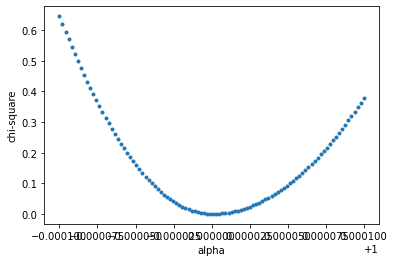

In [56]:
plt.plot(alp,error,".")
#plt.axvspan(alp[left],alp[right], alpha=0.3, color='red')
#plt.plot(alp,np.ones(len(alp)))
#plt.xlim(0.995,1.005)
#plt.ylim(-1,40)
plt.xlabel("alpha")
plt.ylabel("chi-square")
#plt.legend()
#plt.savefig("chsq.png")

### Plot chisq vs alpha for different kmax values

In [57]:
alp=np.linspace(0.9,1.1,200)

kmin=0.005
kmax_min=0.05
kmax_max=0.2
all_errors=[]
all_kmax=[]
for kmax in reversed(np.unique(k)):
    if kmax>kmax_min and kmax<kmax_max:
        pkg,bkg,jrm,jcov,_=cutslice(kmin,kmax)
        errori=chisq_alp(pkg,bkg,alp,jcov)
        all_errors.append(errori)
        all_kmax.append(kmax)
        print(kmax,np.min(errori))

kmax=0.19500000000000003, kmin=0.005, nbins=823, nmocks=922, hf = 9.494845360824742
0.19500000000000003 9.433654914919027
kmax=0.18500000000000003, kmin=0.005, nbins=713, nmocks=922, hf = 4.449275362318841
0.18500000000000003 4.1138402071590505
kmax=0.17500000000000002, kmin=0.005, nbins=613, nmocks=922, hf = 3.0
0.17500000000000002 2.2399001349263323
kmax=0.165, kmin=0.005, nbins=443, nmocks=922, hf = 1.930817610062893
0.165 1.3008232666365527
kmax=0.155, kmin=0.005, nbins=371, nmocks=922, hf = 1.6775956284153006
0.155 1.0805907410810303
kmax=0.145, kmin=0.005, nbins=307, nmocks=922, hf = 1.502446982055465
0.145 0.6782696953915318
kmax=0.13499999999999998, kmin=0.005, nbins=251, nmocks=922, hf = 1.3766816143497758
0.13499999999999998 0.4499617920461306
kmax=0.12499999999999997, kmin=0.005, nbins=202, nmocks=922, hf = 1.2827298050139275
0.12499999999999997 0.3649243381104171
kmax=0.11499999999999998, kmin=0.005, nbins=160, nmocks=922, hf = 1.2118421052631578
0.11499999999999998 0.20136

Text(0.5, 0, 'alpha')

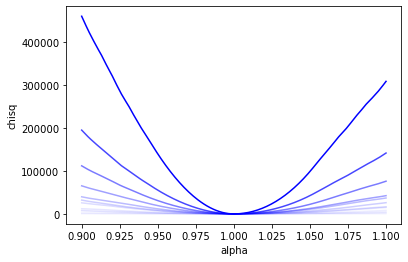

In [58]:
color_alpha = np.geomspace(1,0.01,len(all_errors))
for i,error in enumerate(all_errors):
    plt.plot(alp,error,alpha=color_alpha[i],color = 'b')
plt.ylabel("chisq")
plt.xlabel("alpha")
#plt.ylim(-1e8,2e9)
#plt.xlim(0.9995,1.0005)
#plt.savefig("all_chisq.png")

### 1sigma constriant vs kmax

Find 1sigma confidence interval (of chisq vs alpha plot) for different kmax.

In [59]:
def find_1sigma(error,llim,rlim):
    least=np.min(error)
    ffe=interpolate.interp1d(alp,error,fill_value="extrapolate")
    alp2=np.linspace(0.9,1.1,20000000)
    ind=np.where((ffe(alp2)<1+least+rlim) & (ffe(alp2)>1+least-llim))
    print(ind)
    left=ind[0][0]
    right=ind[0][-1]
    print(alp2[left],alp2[right])
    return alp2[right]-alp2[left]


In [84]:
sigma=[]
count=1
for i in all_errors:
    #print(np.std(i)/np.max(i))
    sigma.append(find_1sigma(i,0.0001/count,0.0001/count))
    count=count+0.1

(array([10034530, 10034531, 10034532]),)
1.0003453050172653 1.0003453250172663
(array([10001070, 10001071, 10001072, 10001073, 10001074, 10001075,
       10001076, 10001077, 10001078, 10053305]),)
1.0000107050005353 1.000533055026653
(array([ 9955469,  9955470,  9955471,  9955472,  9955473,  9955474,
        9955475,  9955476,  9955477,  9955478,  9955479,  9955480,
        9955481,  9955482,  9955483,  9955484, 10055864]),)
0.9995546949777347 1.0005586450279322
(array([ 9948507, 10059914]),)
0.9994850749742538 1.0005991450299574
(array([ 9941749, 10061880]),)
0.9994174949708748 1.0006188050309404
(array([ 9939087,  9939088, 10068772, 10068773]),)
0.9993908749695438 1.0006877350343868
(array([ 9938535,  9938536, 10078175, 10078176, 10078177, 10078178]),)
0.9993853549692678 1.0007817850390892
(array([ 9915273,  9915274,  9915275,  9915276, 10080283, 10080284,
       10080285]),)
0.9991527349576368 1.0008028550401429
(array([ 9891993,  9891994,  9891995,  9891996,  9891997,  9891998,
   

In [85]:
len(sigma)

15

Text(0, 0.5, '1sigma_alpha')

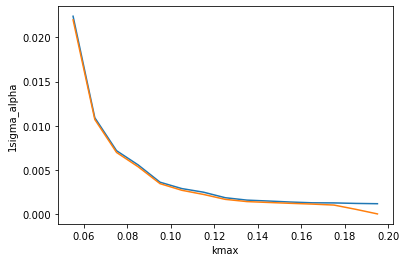

In [97]:
plt.plot(all_kmax,sigmaf)
plt.plot(all_kmax,sigma)
plt.xlabel("kmax")
plt.ylabel("1sigma_alpha")
#plt.savefig("join_1sigma_vs_kmax.png")

In [87]:
sigmaf

[0.0011562000578099196,
 0.0011901600595078943,
 0.001247410062370613,
 0.0012599800629989888,
 0.001347160067357911,
 0.0014595300729765004,
 0.0015634300781715016,
 0.001835830091791557,
 0.002462830123141413,
 0.0028730401436520836,
 0.0035944101797206196,
 0.005542450277122524,
 0.0071656003582800665,
 0.010902300545115096,
 0.022408551120427722]

In [88]:
sigma

[2.0000000988673605e-08,
 0.0005223500261175573,
 0.0010039500501974885,
 0.001114070055703631,
 0.001201310060065519,
 0.0012968600648429751,
 0.001396430069821375,
 0.0016501200825060902,
 0.002206630110331509,
 0.002679560133977965,
 0.0034297701714884887,
 0.005330580266529106,
 0.0069666603483330425,
 0.01070306053515302,
 0.02199959109997951]

In [89]:
np.savez('join_1sigma.npz',kmax=all_kmax, sigmahf=sigmaf,sigma=sigma,hf=hf[10:25])


In [90]:
data = np.load('join_1sigma.npz')

In [91]:
df= pd.DataFrame.from_dict({item: data[item] for item in data.files}, orient='index')


In [92]:
df.T

,kmax,sigmahf,sigma,hf
0,0.195,0.001156,2.000000e-08,4.470874
1,0.185,0.001190,5.223500e-04,3.009804
2,0.175,0.001247,1.003950e-03,2.325758
3,0.165,0.001260,1.114070e-03,1.930818
4,0.155,0.001347,1.201310e-03,1.677596
5,0.145,0.001460,1.296860e-03,1.502447
6,0.135,0.001563,1.396430e-03,1.378743
7,0.125,0.001836,1.650120e-03,1.284519
8,0.115,0.002463,2.206630e-03,1.213439
9,0.105,0.002873,2.679560e-03,1.158491


In [93]:
np.array(sigmaf)/np.array(sigma)

array([5.78100000e+04, 2.27847229e+00, 1.24250212e+00, 1.13097023e+00,
       1.12140913e+00, 1.12543374e+00, 1.11959067e+00, 1.11254333e+00,
       1.11610465e+00, 1.07220588e+00, 1.04800322e+00, 1.03974614e+00,
       1.02855601e+00, 1.01861524e+00, 1.01858944e+00])

In [95]:
np.sqrt(df.T["hf"])

0     2.114444
1     1.734879
2     1.525043
3     1.389539
4     1.295220
5     1.225743
6     1.174199
7     1.133366
8     1.101562
9     1.076332
10    1.056581
11    1.040927
12    1.028302
13    1.018986
14    1.012162
Name: hf, dtype: float64